In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import math

# importing Qiskit
from qiskit import IBMQ, BasicAer, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

# import basic plot tools
from qiskit.visualization import plot_histogram

def r2 (circ, x, y):
    circ.cu1 (-math.pi/2, x, y)

def r3 (circ, x, y, z):
    circ.cu1 (-math.pi/4, x, z)
    r2 (circ, y, z)

def r4 (circ, w, x, y, z):
    circ.cu1 (-math.pi/8, w, z)
    r3 (circ, x, y, z)

def r5 (circ, v, w, x, y, z):
    circ.cu1 (-math.pi/16, v, z)
    r4 (circ, w, x, y, z)

def r6 (circ, u, v, w, x, y, z):
    circ.cu1 (-math.pi/32, u, z)
    r5 (circ, v, w, x, y, z)

def uni (circ, a, b, c, d, x, y ,z):
    circ.cu1 (c-a, x, y)
    circ.u1 (a,x)
    circ.cu1 (b-a, x, z)
    circ.ccx (x, y, z)
    circ.cu1 ((a+d-b-c)/2, x, z)
    circ.ccx (x, y, z)
    circ.cu1 ((a+d-b-c)/2, x, y)
    circ.cu1 ((a+d-b-c)/2, x, z)

def bigU (circ,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u):
    uni (circ,0,a,b,c,m,n,o)
    uni (circ,d,0,e,f,m,p,q)
    uni (circ,g,h,0,i,m,r,s)
    uni (circ,j,k,l,0,m,t,u)

def finU (circ,m,n,o,p,q,r,s,t,u):
    bigU(circ,3*math.pi/32,13*math.pi/32,7*math.pi/16,3*math.pi/32,3*math.pi/8,math.pi/8,13*math.pi/32,3*math.pi/8,math.pi/8,7*math.pi/16,math.pi/8,math.pi/8,m,n,o,p,q,r,s,t,u)
    #bigU(circ,math.pi/2,math.pi/8,math.pi/4,math.pi/2,math.pi/4,math.pi/4,math.pi/8,math.pi/4,math.pi/8,math.pi/4,math.pi/4,math.pi/8,m,n,o,p,q,r,s,t,u)
    #bigU(circ,9*math.pi/32,3*math.pi/8,15*math.pi/32,9*math.pi/32,3*math.pi/8,math.pi/8,3*math.pi/8,3*math.pi/8,3*math.pi/8,15*math.pi/32,math.pi/8,3*math.pi/8,m,n,o,p,q,r,s,t,u)

def finU2 (circ,m,n,o,p,q,r,s,t,u):
    finU (circ,m,n,o,p,q,r,s,t,u)
    finU (circ,m,n,o,p,q,r,s,t,u)

def finU4 (circ,m,n,o,p,q,r,s,t,u):
    finU2 (circ,m,n,o,p,q,r,s,t,u)
    finU2 (circ,m,n,o,p,q,r,s,t,u)

def finU8 (circ,m,n,o,p,q,r,s,t,u):
    finU4 (circ,m,n,o,p,q,r,s,t,u)
    finU4 (circ,m,n,o,p,q,r,s,t,u)

def finU16 (circ,m,n,o,p,q,r,s,t,u):
    finU8 (circ,m,n,o,p,q,r,s,t,u)
    finU8 (circ,m,n,o,p,q,r,s,t,u)

def finU32 (circ,m,n,o,p,q,r,s,t,u):
    finU16 (circ,m,n,o,p,q,r,s,t,u)
    finU16 (circ,m,n,o,p,q,r,s,t,u)

def fU (circ,a,b,c,d,e,f,n,o,p,q,r,s,t,u):
    finU (circ,f,n,o,p,q,r,s,t,u)
    finU2 (circ,e,n,o,p,q,r,s,t,u)
    finU4 (circ,d,n,o,p,q,r,s,t,u)
    finU8 (circ,c,n,o,p,q,r,s,t,u)
    finU16 (circ,b,n,o,p,q,r,s,t,u)
    finU32 (circ,a,n,o,p,q,r,s,t,u)

qc = QuantumCircuit()

q = QuantumRegister(14, 'q')
c = ClassicalRegister(6, 'c')

qc.add_register(q)
qc.add_register(c)

qc.h(q[1])
qc.h(q[2])
qc.h(q[3])
qc.h(q[4])
qc.h(q[5])

#qc.x(q[6])
qc.x(q[7])
qc.x(q[8])
qc.x(q[9])
#qc.x(q[10])
qc.x(q[11])
qc.x(q[12])
qc.x(q[13])

fU (qc, q[0], q[1], q[2], q[3], q[4], q[5], q[6], q[7], q[8], q[9], q[10], q[11], q[12], q[13])
qc.h(q[0])
r2 (qc, q[0], q[1])
qc.h(q[1])
r3 (qc, q[0], q[1], q[2])
qc.h(q[2])
r4 (qc, q[0], q[1], q[2], q[3])
qc.h(q[3])
r5 (qc, q[0], q[1], q[2], q[3], q[4])
qc.h(q[4])
r6 (qc, q[0], q[1], q[2], q[3], q[4], q[5])
qc.h(q[5])

qc.measure (q[0], c[0])
qc.measure (q[1], c[1])
qc.measure (q[2], c[2])
qc.measure (q[3], c[3])
qc.measure (q[4], c[4])
qc.measure (q[5], c[5])


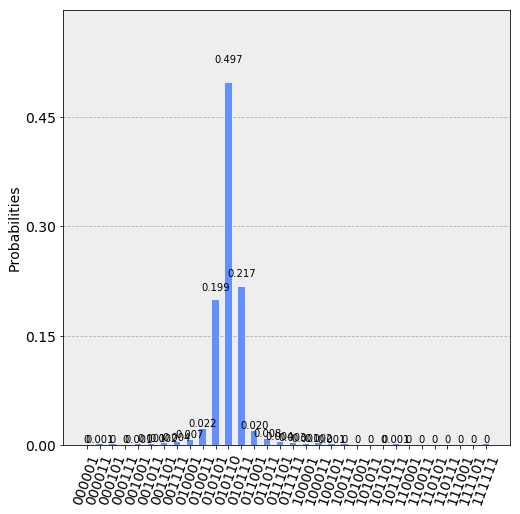

In [37]:
backend = BasicAer.get_backend('qasm_simulator')
shots = 4096
results = execute(qc, backend=backend, shots=shots).result()
answer = results.get_counts()
plot_histogram(answer,figsize=(8, 8))

In [16]:
qc.draw()